In [3]:
#import modules and load the data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
from IPython.display import HTML
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV



In [4]:
df = pd.read_csv('1641405turnover.csv')
df.head()

,Months_active,Distance_from_work,Age,Disciplined,Children,Social_drinker,Social_smoker,Pets,Weight,Height,BMI,Absent_hours
0,10,2.36,37,no,0,no,no,0,83,172,28,8
1,3,7.22,28,no,1,yes,no,4,80,172,27,8
2,12,5.82,40,no,1,yes,no,1,73,171,25,8
3,14,4.96,47,no,2,no,no,1,86,165,32,1
4,14,4.96,47,no,2,no,no,1,86,165,32,2


In [5]:
unique_values = df['Disciplined'].unique()
print(unique_values)

['no' 'yes']


In [6]:
# Creating a copy of Original Dataframe to avoid modifying the Original data
df_copy = df.copy()
df_copy.head()

,Months_active,Distance_from_work,Age,Disciplined,Children,Social_drinker,Social_smoker,Pets,Weight,Height,BMI,Absent_hours
0,10,2.36,37,no,0,no,no,0,83,172,28,8
1,3,7.22,28,no,1,yes,no,4,80,172,27,8
2,12,5.82,40,no,1,yes,no,1,73,171,25,8
3,14,4.96,47,no,2,no,no,1,86,165,32,1
4,14,4.96,47,no,2,no,no,1,86,165,32,2


In [7]:
# Getting dummies of the categorical columns
df_dummies = pd.get_dummies(df_copy[['Social_drinker', 'Social_smoker','Disciplined']]).astype(int)
df_dummies.head()

,Social_drinker_no,Social_drinker_yes,Social_smoker_no,Social_smoker_yes,Disciplined_no,Disciplined_yes
0,1,0,1,0,1,0
1,0,1,1,0,1,0
2,0,1,1,0,1,0
3,1,0,1,0,1,0
4,1,0,1,0,1,0


In [8]:
#combining the dummies with the dataframe
df_copy = pd.concat([df_copy,df_dummies], axis=1)
df_copy.head()

,Months_active,Distance_from_work,Age,Disciplined,Children,Social_drinker,Social_smoker,Pets,Weight,Height,BMI,Absent_hours,Social_drinker_no,Social_drinker_yes,Social_smoker_no,Social_smoker_yes,Disciplined_no,Disciplined_yes
0,10,2.36,37,no,0,no,no,0,83,172,28,8,1,0,1,0,1,0
1,3,7.22,28,no,1,yes,no,4,80,172,27,8,0,1,1,0,1,0
2,12,5.82,40,no,1,yes,no,1,73,171,25,8,0,1,1,0,1,0
3,14,4.96,47,no,2,no,no,1,86,165,32,1,1,0,1,0,1,0
4,14,4.96,47,no,2,no,no,1,86,165,32,2,1,0,1,0,1,0


In [9]:
# Independent Variable columns 
Months_active = df_copy['Months_active']
Distance_from_work = df_copy['Distance_from_work']
Age = df_copy['Age']
Children = df_copy['Children']

                    Months_active  Distance_from_work       Age  Children
Months_active            1.000000           -0.381367  0.669429 -0.052922
Distance_from_work      -0.381367            1.000000 -0.254506  0.387894
Age                      0.669429           -0.254506  1.000000  0.055206
Children                -0.052922            0.387894  0.055206  1.000000


<Axes: >

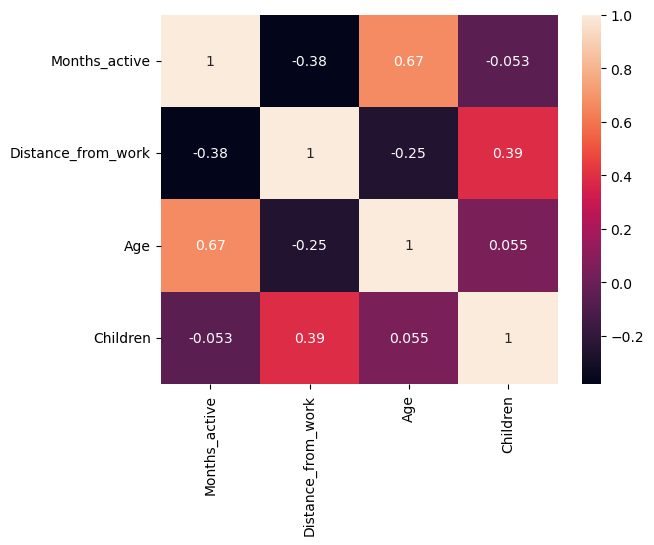

In [10]:
# Analysing the correlation between the variables Months_active, Distance_from_work, Age, and Children
# Correlation Heatmap
data = df_copy[['Months_active','Distance_from_work','Age','Children']]
matrix = data.corr()
print(matrix)
sns.heatmap(matrix, annot=True)

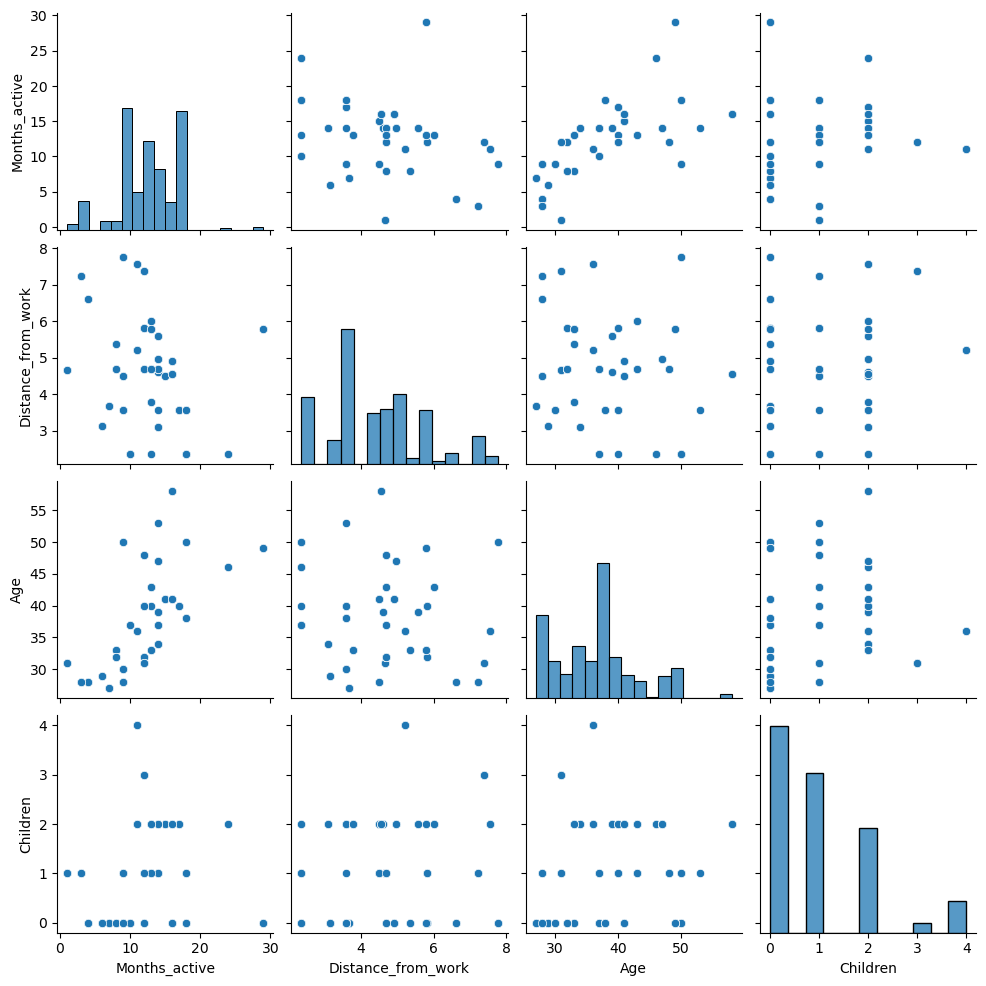

In [11]:
sns.pairplot(df_copy[['Months_active', 'Distance_from_work', 'Age', 'Children']])

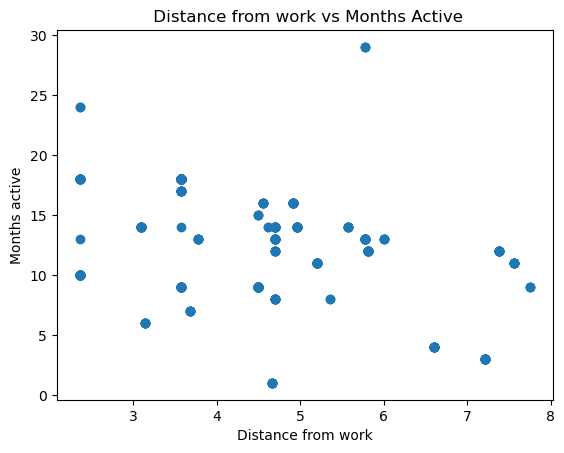

PearsonRResult(statistic=-0.38136677898720495, pvalue=1.7539792027849166e-24)

In [12]:
# Corelation between months active and distance from work 
plt.scatter(Distance_from_work,Months_active)
plt.xlabel('Distance from work')
plt.ylabel('Months active')
plt.title(' Distance from work vs Months Active')
plt.show()
scipy.stats.pearsonr(Distance_from_work,Months_active)

There’s a **weak to moderate negative linear relationship** between the two variables distance from work and Months active.
The corelation between distance from work and Months active has a **p-value of 1.753979202784894e-24** which is extremely low so the negative correlation is **highly significant**

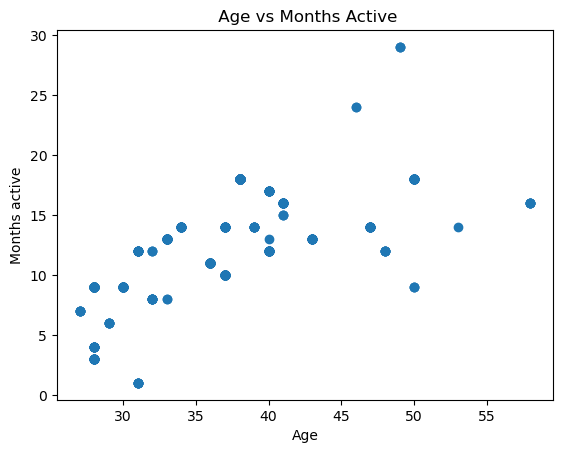

PearsonRResult(statistic=0.6694285523556978, pvalue=8.970229527608187e-88)

In [13]:
# Corelation between Age and Months active
plt.scatter(Age,Months_active)
plt.xlabel('Age')
plt.ylabel('Months active')
plt.title(' Age vs Months Active')
plt.show()
scipy.stats.pearsonr(Age,Months_active)

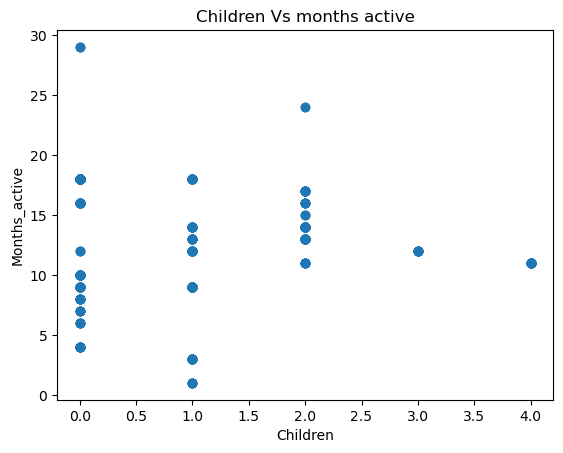

PearsonRResult(statistic=-0.052921625192836975, pvalue=0.1725242688443075)

In [14]:
# Correlation between Children and Months active 
plt.scatter(Children,Months_active)
plt.xlabel('Children')
plt.ylabel('Months_active')
plt.title('Children Vs months active')
plt.show()
scipy.stats.pearsonr(Children,Months_active)

There seems to be no corelation between Children and months active. The p-value of 0.1725 is greater than 0.05 which  means the result is not statistically significant

# Assignment 2

In [15]:
# regression model  predicting Months_active using  the other independent  variables : Distance_from_work, Age, and Children


model1 = smf.ols('Months_active ~ Distance_from_work + Age + Children ', data = df_copy).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          Months_active   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     216.9
Date:                Sat, 22 Mar 2025   Prob (F-statistic):           5.50e-98
Time:                        15:30:24   Log-Likelihood:                -1699.5
No. Observations:                 666   AIC:                             3407.
Df Residuals:                     662   BIC:                             3425.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.6227      0

In [16]:
# p>t is the p value column
# The R-squared value is 0.496 this means that 49.6% of the total variance in Months active can be explained by a combination
# distance from work , age and children. So 51.4% has to be because of other factor.

In [17]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif #import the VIF function
from statsmodels.tools.tools import add_constant #import the add_constant function

X = df_copy[['Distance_from_work', 'Age', 'Children']].dropna() #select the relevant variables and delete missing values
X = add_constant(X) #add a constant to the variables. VIF WON'T WORK CORRECTLY IF YOU DON'T DO THIS

#Creating  a dataframe that contains the VIF values
VIF_data = pd.DataFrame() 
VIF_data["variable"] = X.columns 
VIF_data["VIF"] = [vif(X,i) 
                   for i in range(len(X.columns))] 
print(VIF_data) 

             variable        VIF
0               const  59.099371
1  Distance_from_work   1.293370
2                 Age   1.102126
3            Children   1.213292


# APA Table 

In [18]:
table = Stargazer([model1])
HTML(table.render_html())

# Assignment 3 

In trying to understand what influences how long employees stay with the company, the management believes some of these factors could be the main influence :  **Distance_from_work**, **Age**, **Children**
In order words they are the variables which we believe have an impact on months active 

**Distance_from_work** :
This variable measures how far employees live from the workplace. According to our analysis, there is an inverse relationship between commuting distance and the number of months employees remain active. In other words, the further employees live from work, the shorter their time with the company tends to be. This suggests that longer commutes may contribute to higher turnover.

**Age**:
According to the model the older an employee the more likely they are to stay longer with the company. This positive relation between age and months active could be due to the older employees seeking greater job stability or having fewer outside opportunities.

**Children** : 
The goal here is to see if having kids influences how long an employee stays with the company. According to the model the number of children an employee has doesn’t have a noticeable impact on how long they stay with the company.

# Assignment 4

In [19]:
#Prepare the data
df = df_copy.dropna() #remove missings
y = df_copy['Months_active'] #select Target
X = df_copy.drop('Months_active',axis=1) #Select features
X = pd.get_dummies(X, drop_first=True) #Turn Fuel_Type into dummy variables
columns = X.columns #create index with column names (needed for last step)
scaler = MinMaxScaler() #initiate the scaler
X = scaler.fit_transform(X) #scale the data
X = pd.DataFrame(X,columns=columns) #turn back into a dataframe

In [ ]:
# Importing LinearRegression
from sklearn.linear_model import LinearRegression

# Using df_copy as DataFrame and the target variable is 'Months_active'
X = df_copy[['Distance_from_work', 'Age', 'Children']]  # Predictor variables
y = df_copy['Months_active']  # Target variable

# Initialize model and cross-validation setup
from sklearn.model_selection import KFold
model = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mad_scores = []

# Perform 5-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit model and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate Mean Absolute Deviation for the fold
    from sklearn.metrics import mean_absolute_error
    mad = mean_absolute_error(y_test, y_pred)
    mad_scores.append(mad)

# Calculate average Mean Average Deviation across all folds
average_mad = np.mean(mad_scores)
print(f"Average Mean Absolute Deviation: {average_mad}")

Average Mean Absolute Deviation: 2.5597084994680666


In [21]:
# Normalize the data
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [22]:
#Ridge grid search
#grid search with Ridge
alpha_range = np.arange(start=1,stop=100,step=1) #define a range of 100 alpha values

In [23]:
#define the aspects of the grid search
cv = RepeatedKFold(n_splits=5) #define the cross validation
param = {'alpha':alpha_range} #create a dictionary that contains the range of alpha values
RidgeModel = Ridge() #define the model

In [ ]:
#create the grid search
RidgeM = GridSearchCV(RidgeModel, 
                      param_grid=param, #the alpha values we defined above
                      scoring ='neg_mean_absolute_error', #use MAE as measure of fit
                      cv=cv) #the cross validation we defined above
RidgeM.fit(X,y)# Fit the random search model
print("Best alpha: ", RidgeM.best_params_['alpha']) #print out the best parameter

Best alpha:  99


In [25]:
RidgeModel = Ridge(alpha=99)
#Run the cross fold validation again (same as earlier)
cv = RepeatedKFold(n_splits=5)
scoresridge = cross_val_score(RidgeModel, X, y, scoring='neg_mean_absolute_error', cv=cv) 

In [26]:
ridgeMAE = mean(absolute(scoresridge)) #Calculate the overall mean absolute error
print('the average prediction error with ridge is: %.0f' % ridgeMAE) #Print the result

the average prediction error with ridge is: 3


# Neural Network 

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import numpy as np

# Define the neural network model
def create_model():
    model = Sequential()
    model.add(Dense(512, input_dim=X.shape[1], activation='relu'))  # Input layer
    for _ in range(4):  # Add 4 more hidden layers
        model.add(Dense(512, activation='relu'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer=Adam(), loss='mean_absolute_error', metrics=['mae'])
    return model



In [28]:
# Initialize cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = []



In [29]:
# Perform 5-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Create and train the model
    model = create_model()
    model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)

    # Predict and calculate MAE
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)


c:\Users\hacky\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


c:\Users\hacky\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


c:\Users\hacky\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000238F66F63E0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\hacky\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\hacky\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [30]:
# Calculate the average MAE
average_mae = np.mean(mae_scores)
print(f"Average Mean Absolute Error (Neural Network): {average_mae}")

# Compare with linear regression
print(f"Average Mean Absolute Error (Linear Regression): {average_mad}")

Average Mean Absolute Error (Neural Network): 0.6257461905479431
Average Mean Absolute Error (Linear Regression): 2.5597084994680666
